In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'white'

In [10]:
df = pd.read_csv("./data.csv", header=None)
df

,0,1,2,3
0,native,8,43.18,2.066008e+03
1,native_with_size_hint,8,39.60,3.943800e+02
2,simd_f32x8,8,37.62,1.168556e+02
3,native_par,8,105605.94,9.967669e+10
4,native,16,75.12,1.543466e+03
...,...,...,...,...
1395,simd_par_better,3225600,1290789.17,4.359594e+10
1396,native,3302400,10665270.37,2.308729e+09
1397,native_with_size_hint,3302400,10675353.59,2.880886e+09
1398,simd_f32x8,3302400,3655542.77,7.684634e+09


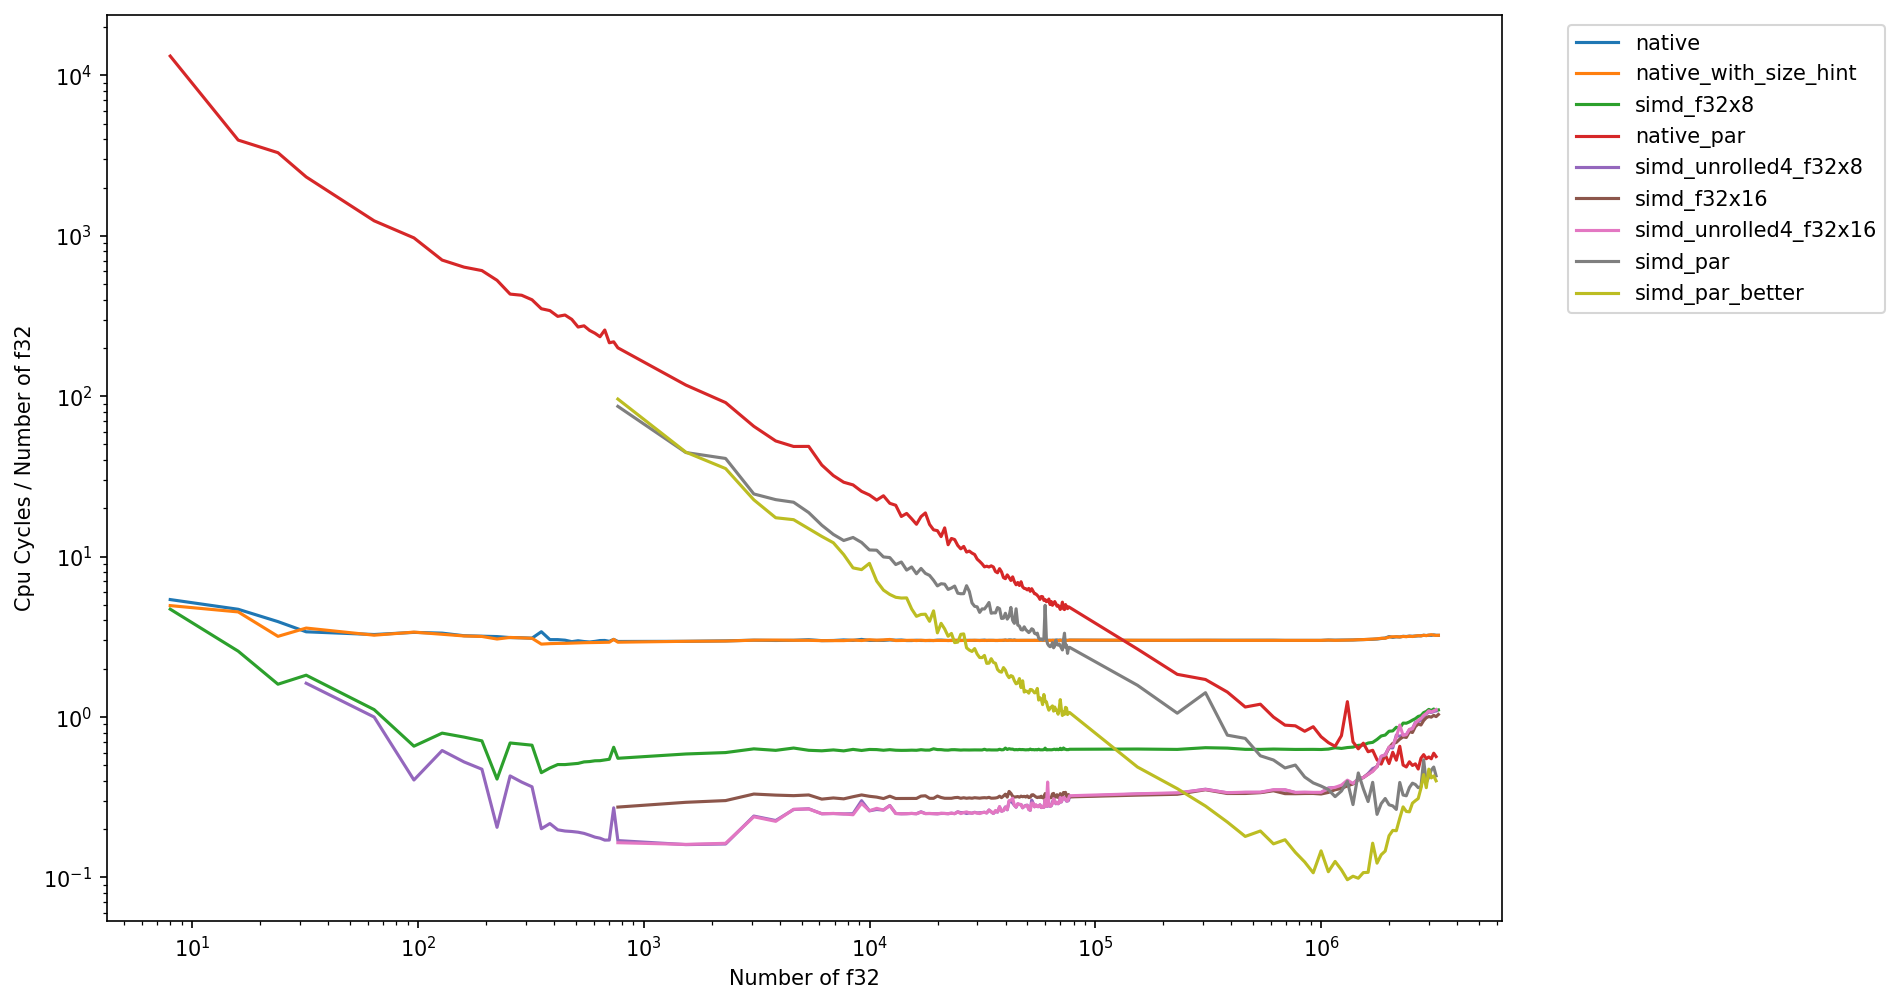

In [11]:
plt.figure(figsize=(12, 8), dpi=150, facecolor='white')
for name in df[0].unique():
    data = df[df[0] == name]
    
    x = data[1].sort_values()
    y = data[2][x.index]
    
    plt.plot(
        x,
        y / x,
        label=name
    )
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Cpu Cycles / Number of f32")
plt.xlabel("Number of f32")
plt.savefig("benchmarks.png")
plt.show()